## Setup

In [1]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt
import numpy as np

run = 7
category =  "single_family"


In [2]:
############ CLUSTER ################
scratch_dir = '/scratch/users/nbachand/Cascade/city_block_cfd'
home_dir = '/home/users/nbachand/Cascade/city_block_cfd'

# ########### LOCAL ###################
# home_dir = '/home/nbachand/Documents/Cascade/city_block'
# scratch_dir = home_dir

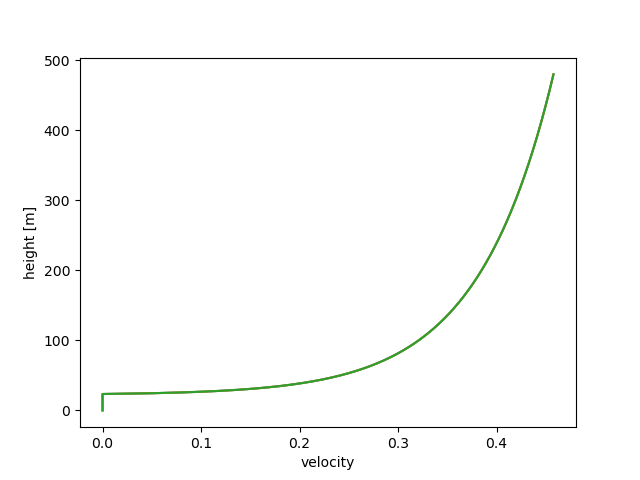

In [3]:
rho = 1.225
mu = 1.7894e-5
Re_tau = 43300
Lz =  480
hm = 20
fric_vel = Re_tau*mu/(hm*rho)

z_0 = 0.061*hm #used for convention, but really y_0
disp = 1.11*hm
shear_vel = fric_vel*np.sqrt(1-disp/Lz)
vK_const = 0.4

LES_params = {
    'uStar': shear_vel,
    'z0': z_0,
    'disp': disp,
    'vK_const': vK_const,
    'Dt': .0675,
    'z_values' : np.linspace(0,Lz,Lz*10)
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

# checking against charles code
# approximate log law mean profile
y_scaled = (LES_params['z_values']-disp)/z_0
y_scaled = np.maximum(1.0, y_scaled)
ux = (shear_vel/vK_const)*np.log(y_scaled)

# physics_setup.plot_log_wind()

plt.plot(ux, LES_params['z_values'])
plt.plot(physics_setup.LES_params['log_wind'], LES_params['z_values'])

In [4]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )


U infinity is 0.45768224669677254 with L = 480.0
flat plate Reynolds number is 15027242.29234871
wall spacing is 0.45603115286411516 for y+ of 500


In [5]:
physics_setup.LES_params['uStar']
physics_setup.LES_params['z_values'][330]
physics_setup.LES_params['log_wind'][330]



0.16842565916900132

In [6]:
probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

slicing took 0 seconds
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 5 seconds
memorizing data took 0 seconds
plotting took 10 seconds


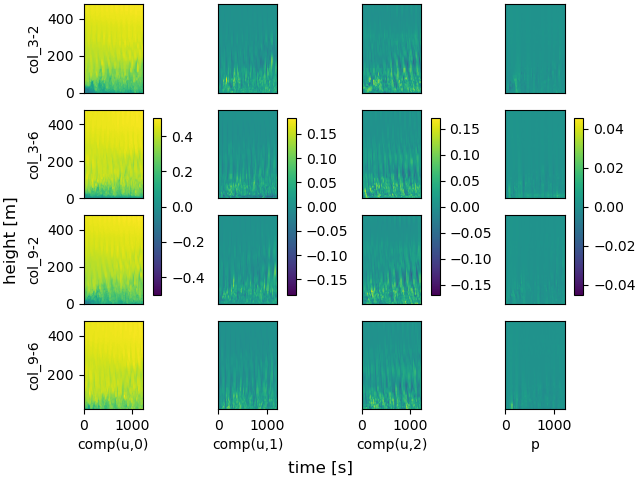

In [33]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,256),
        # 'comp(u,2)' : np.linspace(-1,1,256)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height [m]',
    'ColorNorm': 'Centered'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[0:-1:100],
    # quants = ['comp(u,2)'],
    parrallel = True,
    plot_params = plot_params
    )


In [ ]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_contour')

In [ ]:
plot_params = {
    'plot_levels' : {
        'comp(u,0)' : np.linspace(0,.1,200),
        'comp(u,1)' : np.linspace(0,.1,200),
        'comp(u,2)' : np.linspace(0,.1,200)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height',
    'plot_every': 100
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[:-10:1],
    quants = ['comp(u,2)'],
    parrallel = True,
    processing = [probePost.mean_convergence],
    plot_params = plot_params
    )

In [ ]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_convergence')

In [ ]:
probes.profile_plots(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-1000:-10],
    # quants = ['comp(u,2)'],
    # stack = np.arange(0,300),
    plot_params = {
        'stack span' : 'y',
        'xlabel': 'velocity [1/s]',
        'ylabel' : 'height'
        },
    parrallel=True
    )

physics_setup.plot_log_wind()

In [ ]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_profile')

slicing took 0 seconds
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 2 seconds
memorizing data took 0 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:347: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds


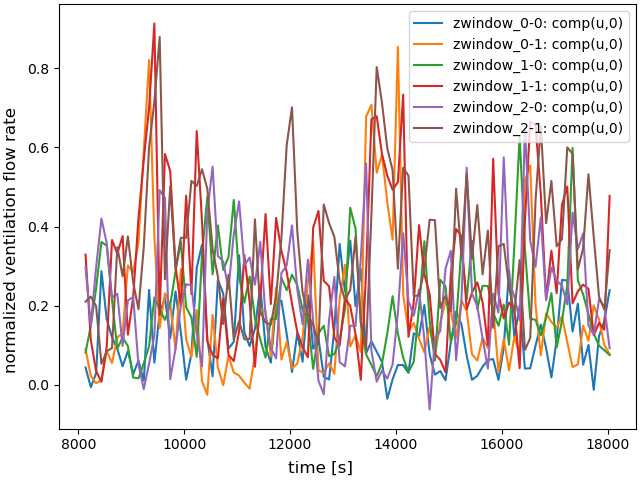

In [21]:
(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[-10000:-1:100],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'normalized ventilation flow rate',
        'xlabel' : 'time [s]',
        'qoi_scaling' : 1/1.0625
        },
    processing = [probePost.ClenshawCurtis_Quadrature],
    parrallel=True
    )

In [22]:
## mean statistics
probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[-10000:-1:1],
    quants = ['comp(u,0)'],
    processing = [probePost.ClenshawCurtis_Quadrature, probePost.time_average],
    parrallel=False
    )

slicing took 0 seconds
reading data took 2868 seconds
memorizing data took 6 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:404: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  n_quants = len(quants)


processing data took 0 seconds


name,zwindow_0-0,zwindow_0-1,zwindow_1-0,zwindow_1-1,zwindow_2-0,zwindow_2-1
var,,,,,,
"comp(u,0)",0.137379,0.191157,0.212909,0.31193,0.239769,0.359186


In [23]:
## rms statistics
probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[-10000:-1:1],
    quants = ['comp(u,0)'],
    processing = [probePost.ClenshawCurtis_Quadrature, probePost.time_rms],
    parrallel=False
    )

slicing took 0 seconds
reading data took 2 seconds
memorizing data took 6 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:404: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  n_quants = len(quants)


processing data took 0 seconds


name,zwindow_0-0,zwindow_0-1,zwindow_1-0,zwindow_1-1,zwindow_2-0,zwindow_2-1
var,,,,,,
"comp(u,0)",0.010756,0.037043,0.018092,0.042473,0.024725,0.035049


In [15]:
# probes.probe_stack

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [18]:
## 10 m flow statistics
probes.statistics(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-10000:-1:1],
    quants = ['comp(u,0)'],
    stack = probes.probe_stack[33],
    processing = [probePost.time_average],
    parrallel=True
    )

slicing took 0 seconds
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 17 seconds
memorizing data took 4 seconds
processing data took 0 seconds


,name,col_3-2,col_3-6,col_9-2,col_9-6
stack,var,,,,
33,"comp(u,0)",0.182896,0.239525,0.199731,0.273147


In [ ]:
video_dir = f'{home_dir}/CHARLES/{category}/R{run}/Videos'
video_series = "u_y2"

!pwd
!echo "saving videos to: "
%cd $video_dir
!python $PYCASCADE_PATH/png2video.py --directory ../Images --namefmt "u_y2". --dt .1 --subsample 1
!python $PYCASCADE_PATH/png2video.py --directory ../Images --namefmt "u_y5". --dt 2 --subsample 1
!python $PYCASCADE_PATH/png2video.py --directory ../Images --namefmt "u_y8". --dt 2 --subsample 1
!python $PYCASCADE_PATH/png2video.py --directory ../Images --namefmt "u_y20". --dt 2 --subsample 1
!echo "returning to: "
%cd -